# Final Project - Data Mining
#**CO2 Emission estimation using machie learning**


## Introduction

In this notebook, we aim to predict CO2 emissions from vehicles using regression techniques. The dataset used comes from Natural Resources Canada and contains fuel consumption and technical specifications for various car models in 2022. ## Introduction

In this notebook, we aim to predict CO2 emissions from vehicles using regression techniques. The dataset used comes from Natural Resources Canada and contains fuel consumption and technical specifications for various car models in 2022.

Dataset: [2022 Fuel Consumption Ratings (Kaggle)](https://www.kaggle.com/datasets/rinichristy/2022-fuel-consumption-ratings)

We will go through the following steps:
- Load and explore the dataset.
- Clean and preprocess the data.
- Train and evaluate multiple regression models.
- Interpret the model through feature importance analysis.


We will go through the following steps:
- Load and explore the dataset.
- Clean and preprocess the data.
- Train and evaluate multiple regression models.
- Interpret the model through feature importance analysis.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style='whitegrid')

## Load and Preview the Dataset

We begin by importing the dataset and displaying the first few rows. This helps to understand the structure and the types of attributes we are dealing with.


In [15]:
# Asegúrate de que el CSV está en el mismo directorio que el notebook
df = pd.read_csv("/MY2022 Fuel Consumption Ratings.csv")

# Vista rápida
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


## Basic Statistics and Missing Values

We check:
- The number of rows and columns,
- Attribute data types,
- Presence of missing values.

This gives a general overview of data quality and potential preprocessing needs.



In [16]:
print("Número de registros:", df.shape[0])
print("Número de atributos:", df.shape[1])
print("\nTipos de atributos:\n", df.dtypes)
print("\nValores nulos por columna:\n", df.isnull().sum())


Número de registros: 946
Número de atributos: 15

Tipos de atributos:
 Model Year                             int64
Make                                  object
Model                                 object
Vehicle Class                         object
Engine Size(L)                       float64
Cylinders                              int64
Transmission                          object
Fuel Type                             object
Fuel Consumption (City (L/100 km)    float64
Fuel Consumption(Hwy (L/100 km))     float64
Fuel Consumption(Comb (L/100 km))    float64
Fuel Consumption(Comb (mpg))           int64
CO2 Emissions(g/km)                    int64
CO2 Rating                             int64
Smog Rating                            int64
dtype: object

Valores nulos por columna:
 Model Year                           0
Make                                 0
Model                                0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders       

## Distribution of CO2 Emissions

We plot a histogram with a KDE curve of the target variable `CO2 Emissions(g/km)` to analyze its distribution. This helps us understand skewness or outliers in the data.


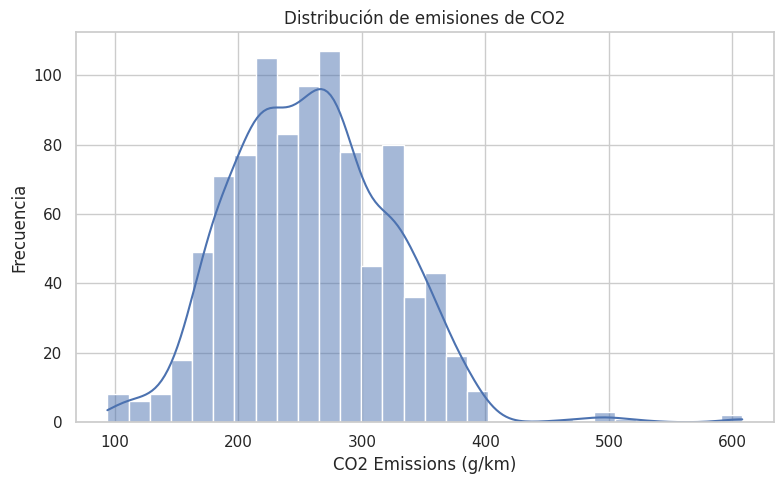

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df["CO2 Emissions(g/km)"], kde=True, bins=30)
plt.title("Distribución de emisiones de CO2")
plt.xlabel("CO2 Emissions (g/km)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


## Boxplots of Key Features

We use boxplots to visualize the distribution and spread of key continuous attributes. This highlights outliers and provides insight into the variability of each feature.


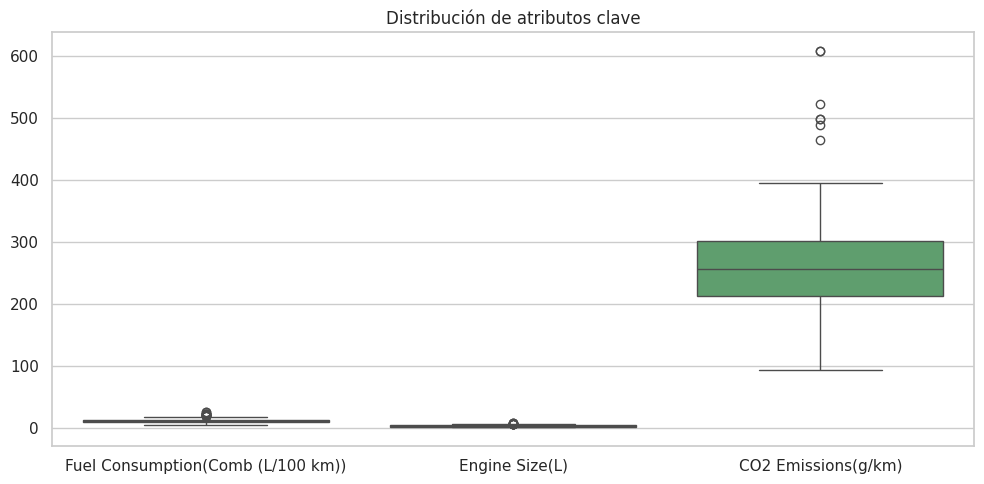

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[[
    "Fuel Consumption(Comb (L/100 km))",
    "Engine Size(L)",
    "CO2 Emissions(g/km)"
]])
plt.title("Distribución de atributos clave")
plt.tight_layout()
plt.show()



## Correlation Matrix

We plot a heatmap of the correlation matrix for all numerical variables to detect multicollinearity and identify which features are most strongly correlated with CO2 emissions.


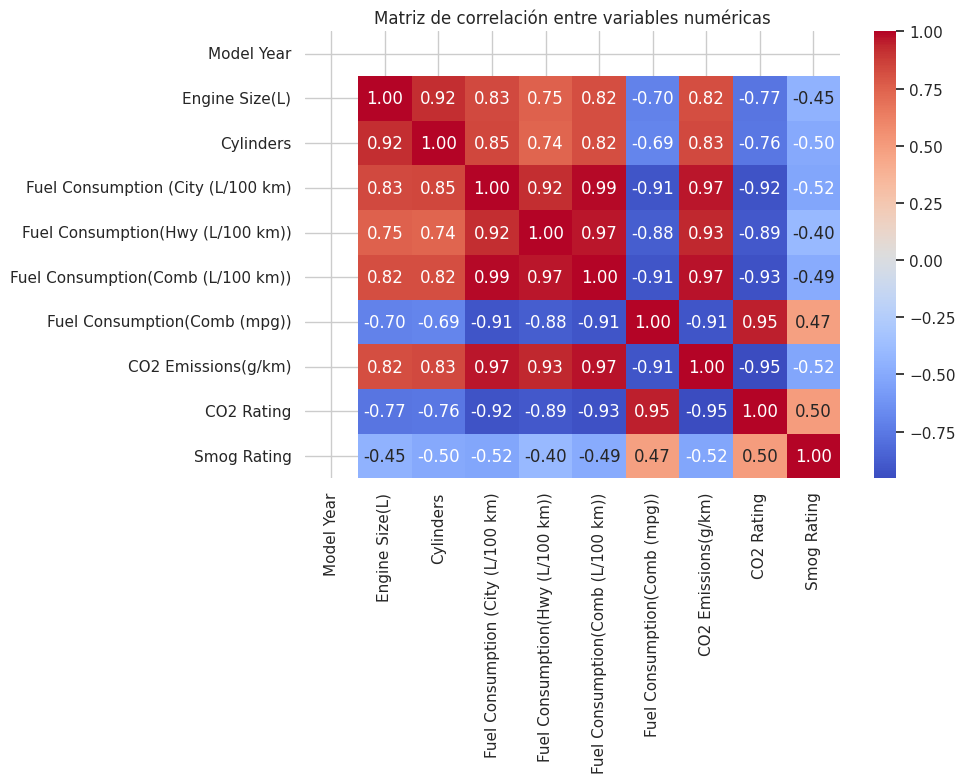

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.tight_layout()
plt.show()


## Data Cleaning and Encoding

Before training models:
- We remove rows with missing values to ensure data integrity.
- Categorical features like 'Fuel Type' and 'Transmission' are transformed using one-hot encoding.
- The dataset is split into training (80%) and test (20%) sets to evaluate model generalization.


In [20]:
# Selección de variables relevantes
features = [
    'Engine Size(L)',
    'Cylinders',
    'Fuel Consumption(Comb (L/100 km))',
    'Transmission',
    'Fuel Type'
]
target = 'CO2 Emissions(g/km)'

# Filtrar y codificar
df_filtered = df[features + [target]].dropna()
df_encoded = pd.get_dummies(df_filtered, columns=['Transmission', 'Fuel Type'], drop_first=True)

# Separar X, y
from sklearn.model_selection import train_test_split

X = df_encoded.drop(target, axis=1)
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Model Training and Evaluation

We train and evaluate three different regression models:
- Linear Regression
- Random Forest Regressor
- Gradient Boosting Regressor

For each model, we compute:
- RMSE (Root Mean Squared Error): to measure prediction error,
- R² Score: to evaluate how well the model explains the variance in the target variable.


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")




Linear Regression: RMSE = 2.57, R² = 1.00
Random Forest: RMSE = 4.63, R² = 0.99
Gradient Boosting: RMSE = 2.39, R² = 1.00


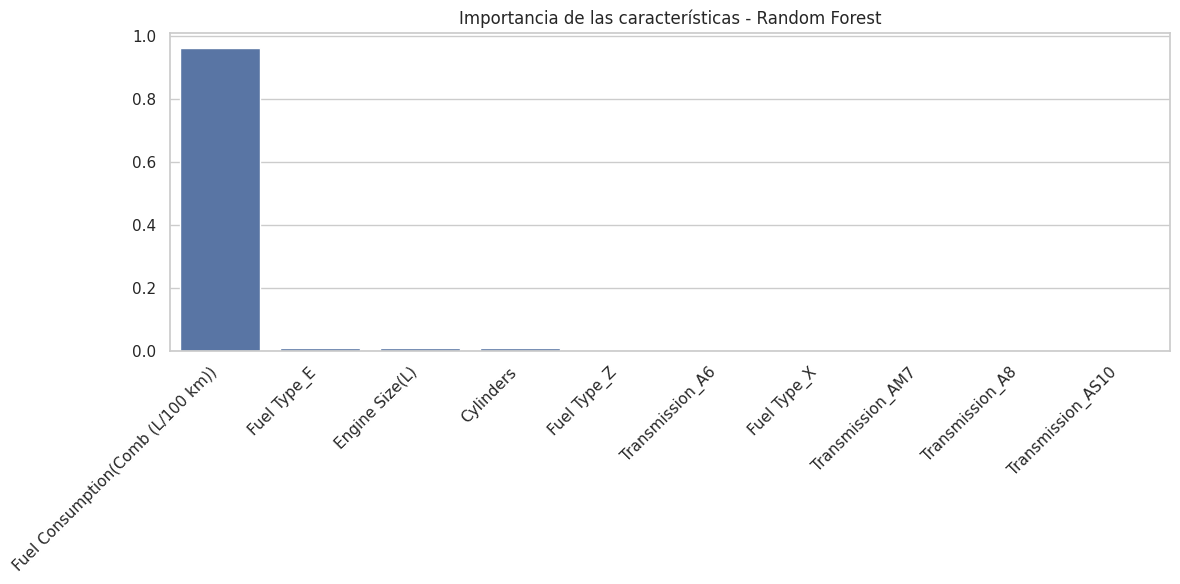

In [22]:
importances = trained_models['Random Forest'].feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=[X.columns[i] for i in indices[:10]], y=importances[indices[:10]])
plt.title("Importancia de las características - Random Forest")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()